# ES_12_1


Lo scopo dell'esercitazione 12 è quello di usare le reti neurali profonde per riconoscere e stinguere singole cifre scritte a mano. 
In questa prima parte (nel notebook 12_1 e 12_1bis) sono stati provati due diversi ottimizatori quali: Adam e RMSprop.

Per il trainig della rete è stato utilizzato il dataset MNIST che comprende $70000$ cifre scritte a mano, ognuna delle quali si presenta in un'immagine quadrata, divisa in una griglia di $28$ pixel. Ogni pixel può assumere $256$ gradazioni di colore grigio, interpolando tra il bianco e il nero, e quindi ogni punto assume qualsiasi valore nell'insieme $\{0,1,\dots,255\}$. 

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 2


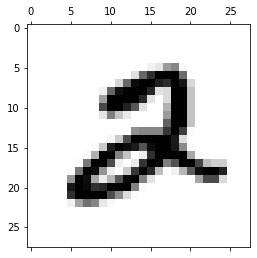

an example of a data point with label 2 before to_categorical ...
... and with label [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[5])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[5,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[5], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[5], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50,activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  #optimizer=RMSprop(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [6]:
# training parameters
batch_size = 32
epochs = 15

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

2021-09-23 07:54:27.136038: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-23 07:54:27.140323: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 60s 998us/step - loss: 0.4089 - accuracy: 0.8896 - val_loss: 0.1368 - val_accuracy: 0.9583
Epoch 2/15
60000/60000 [==============================] - 46s 766us/step - loss: 0.1717 - accuracy: 0.9562 - val_loss: 0.1054 - val_accuracy: 0.9676
Epoch 3/15
60000/60000 [==============================] - 44s 738us/step - loss: 0.1284 - accuracy: 0.9680 - val_loss: 0.0990 - val_accuracy: 0.9717
Epoch 4/15
60000/60000 [==============================] - 47s 781us/step - loss: 0.0974 - accuracy: 0.9751 - val_loss: 0.0825 - val_accuracy: 0.9761
Epoch 5/15
60000/60000 [==============================] - 44s 730us/step - loss: 0.0815 - accuracy: 0.9794 - val_loss: 0.0783 - val_accuracy: 0.9799
Epoch 6/15
60000/60000 [==============================] - 44s 728us/step - loss: 0.0697 - accuracy: 0.9825 - val_loss: 0.0775 - val_accuracy: 0.9807
Epoch 7/15
60000/60000 [==============================] 

10000/10000 [==============================] - 1s 127us/step

Test loss: 0.09135301975294743
Test accuracy: 0.9817000031471252


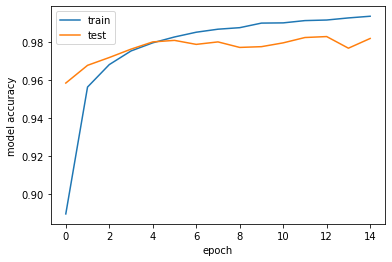

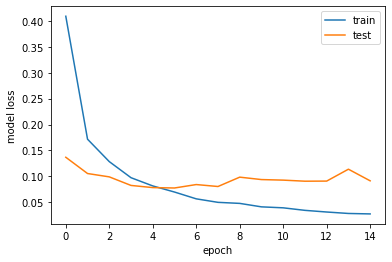

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

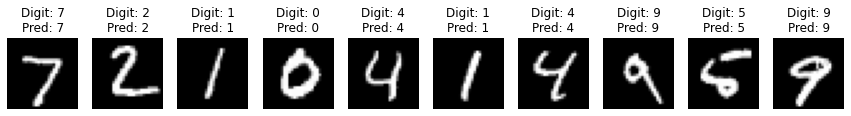

In [8]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPred: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()